In [ ]:
# 구글 코랩에서 pyplot이용시 한글쓰고 싶으면 그냥 실행해라...
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

['.config', '연도별나라별방한외국인데이터(ANSI).csv', 'sample_data']
************************************************************************************************************************************************************************************************************************************************************
['2010', '그리스', '7975']
['2010', '남아프리카공화국', '9633']
['2010', '네덜란드', '22669']
['2010', '노르웨이', '12821']
['2010', '뉴질랜드', '26973']
['2010', '대만', '406352']
['2010', '덴마크', '7978']
['2010', '독일', '98119']
['2010', '러시아', '150730']
['2010', '루마니아', '8699']
************************************************************************************************************************************************************************************************************************************************************
★ 전체기간동안 각 나라별 총 한국 방문자수(내림차순 정렬): [np.int64(54126457), np.int64(33809773), np.int64(11394201), np.int64(9902521), np.int64(6165889), np.int64(5466160), np.int64(5235316), np.int64(353

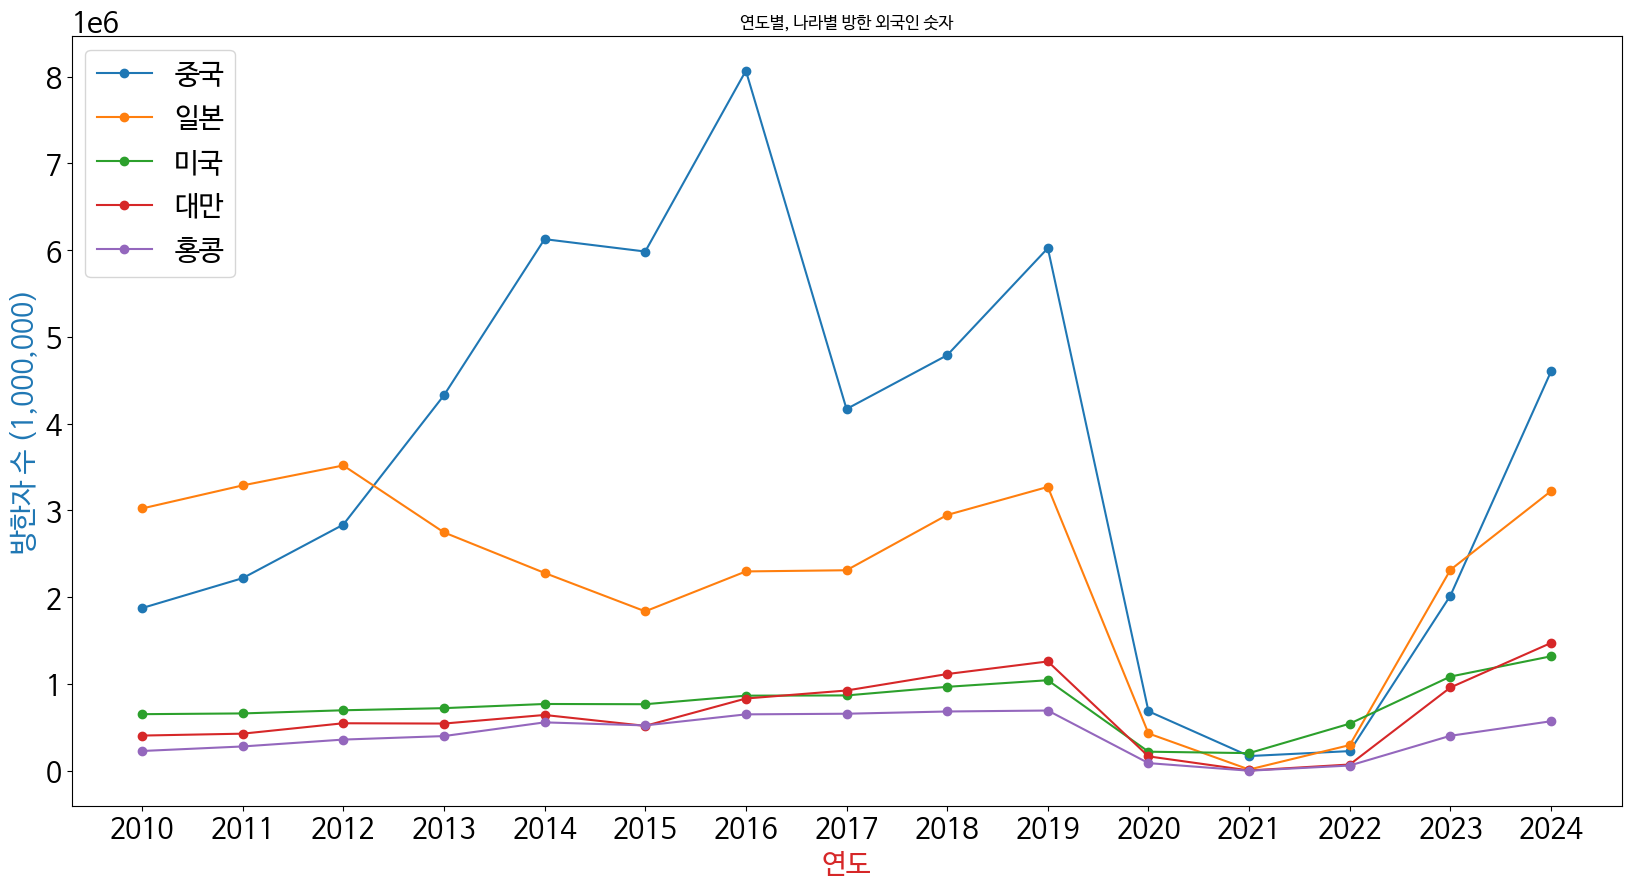

In [32]:
from google.colab import files
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
import os
import csv
files =  os.listdir('./')
print(files)
print('************************************************************************************************************************************************************************************************************************************************************')

f = open(files[1], 'r', encoding='cp949')
f_reader = csv.reader(f)
csv_data = []
for line in f_reader:
  csv_data.append(line)

# 데이터 견본 엿보기
for i in range(10):
  print(csv_data[i])

years = []
countries = []
for i in range(len(csv_data)):
  years.append(csv_data[i][0])
  countries.append(csv_data[i][1])

# 혹시 있을 중복 제거후 오름차순으로 정렬
years = list(set(years))
years.sort()
countries = list(set(countries))
countries.sort()
#print(years)
#print(countries)

country_visitor_total = {}
for c in range(len(countries)):
  country_total = 0
  for i in range(len(csv_data)):
    if csv_data[i][1] == countries[c]:
      country_total = country_total + int(csv_data[i][2])
  country_visitor_total[countries[c]] = country_total

#print(country_visitor_total)
visitor_total_desc = []
for i in range(len(country_visitor_total)):
  visitor_total_desc.append(country_visitor_total.get(countries[i]))

#print(visitor_total_desc)

visitor_total_desc = list(np.sort(visitor_total_desc))[::-1]
print('************************************************************************************************************************************************************************************************************************************************************')
print('★ 전체기간동안 각 나라별 총 한국 방문자수(내림차순 정렬): ', end='')
print(visitor_total_desc)

top5_countries = []
for i in range(5):
  for k, v in country_visitor_total.items():
    if v == visitor_total_desc[i]:
      top5_countries.append(k)
print('★ 전체기간동안 총 한국 방문자수가 가장 높은 TOP5 나라: ', end='')
print(top5_countries)

visitors = {} # 키(나라이름(스트링)): 값(년단위 방문자 수 데이터(리스트))
for i in range(len(top5_countries)):
  visitors_per_country = []
  for j in range(len(csv_data)):
    if csv_data[j][1] == top5_countries[i]:
      visitors_per_country.append(int(csv_data[j][2])) # 원래 방문자수 데이터(String) -> int로 변환해서 저장
  visitors[top5_countries[i]] = visitors_per_country # 딕셔너리에 데이터 삽입하기 / 키(나라): 값([나라에 해당하는 2010~2024년까지의 방문자 수 데이터])

#print(visitors) # 방금 만든 딕셔너리 어떻게 생겨먹었는지 함 봐야지

plt.rc('font', family='NanumBarunGothic') # pyplot에 폰트 적용(한글 깨짐 극복)
#plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

fig, ax1 = plt.subplots(figsize=(20, 10)) # 그래프 사이즈 설정 (가로, 세로) 단위는 inch

# 나라마다 꺾은선 그래프 데이터 1개씩 생성
for country in top5_countries:
  if len(visitors.get(country)) == len(years): # ValueError: x and y must have same first dimension 오류 발생 방지
    ax1.plot(years, visitors.get(country), marker='o', label=country)  # x축: 2010 2011 2012... / y축: visitors 딕셔너리의 키(나라이름)을 이용해 얻어낸 값(방문자 수 리스트) / 라벨: 나라이름

ax1.set_xlabel("연도", color='tab:red') # x축 이름 설정
ax1.set_ylabel("방한자 수 (1,000,000)", color='tab:blue') # y축 이름 설정

# 제목 및 범례
plt.title("연도별, 나라별 방한 외국인 숫자") # 그래프 이름 설정
ax1.legend(loc="upper left") # 레이블 위치 설정

plt.show() # 그래프 인쇄

